<a href="https://colab.research.google.com/github/AsadovDovud/Data_Science_Projects/blob/main/Red_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
# Mathematical operations on arrays
import numpy as np
# For data analysis and manipulation tool
import pandas as pd
# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Implement machine learning models and statistical modelling
import sklearn
# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
# Completing missing values with simple strategies
from sklearn.impute import SimpleImputer
# Categorical to integer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
# Building pipline and use automate it
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [171]:
df = pd.read_csv('/content/RedWIneTraining.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1279 non-null   float64
 1   volatile acidity      1279 non-null   float64
 2   citric acid           1279 non-null   float64
 3   residual sugar        1279 non-null   float64
 4   chlorides             1279 non-null   float64
 5   free sulfur dioxide   1279 non-null   float64
 6   total sulfur dioxide  1279 non-null   float64
 7   density               1279 non-null   float64
 8   pH                    1279 non-null   float64
 9   sulphates             1279 non-null   float64
 10  alcohol               1279 non-null   float64
 11  quality               1279 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 120.0 KB


In [173]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.327052,0.527791,0.271423,2.507897,0.087913,16.004691,47.122752,0.996744,3.308577,0.660539,10.403922,5.629398
std,1.733546,0.179465,0.193675,1.340013,0.047775,10.446824,33.407139,0.001870,0.154104,0.174517,1.076352,0.797264
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000,3.000000
25%,7.200000,0.390000,0.095000,1.900000,0.071000,7.000000,22.000000,0.995655,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,38.000000,0.996760,3.300000,0.620000,10.100000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.500000,63.000000,0.997800,3.400000,0.740000,11.000000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [174]:
df.corrwith(df['quality'])

fixed acidity           0.126378
volatile acidity       -0.396167
citric acid             0.225020
residual sugar          0.035847
chlorides              -0.137006
free sulfur dioxide    -0.053529
total sulfur dioxide   -0.175736
density                -0.168054
pH                     -0.036967
sulphates               0.244217
alcohol                 0.497745
quality                 1.000000
dtype: float64

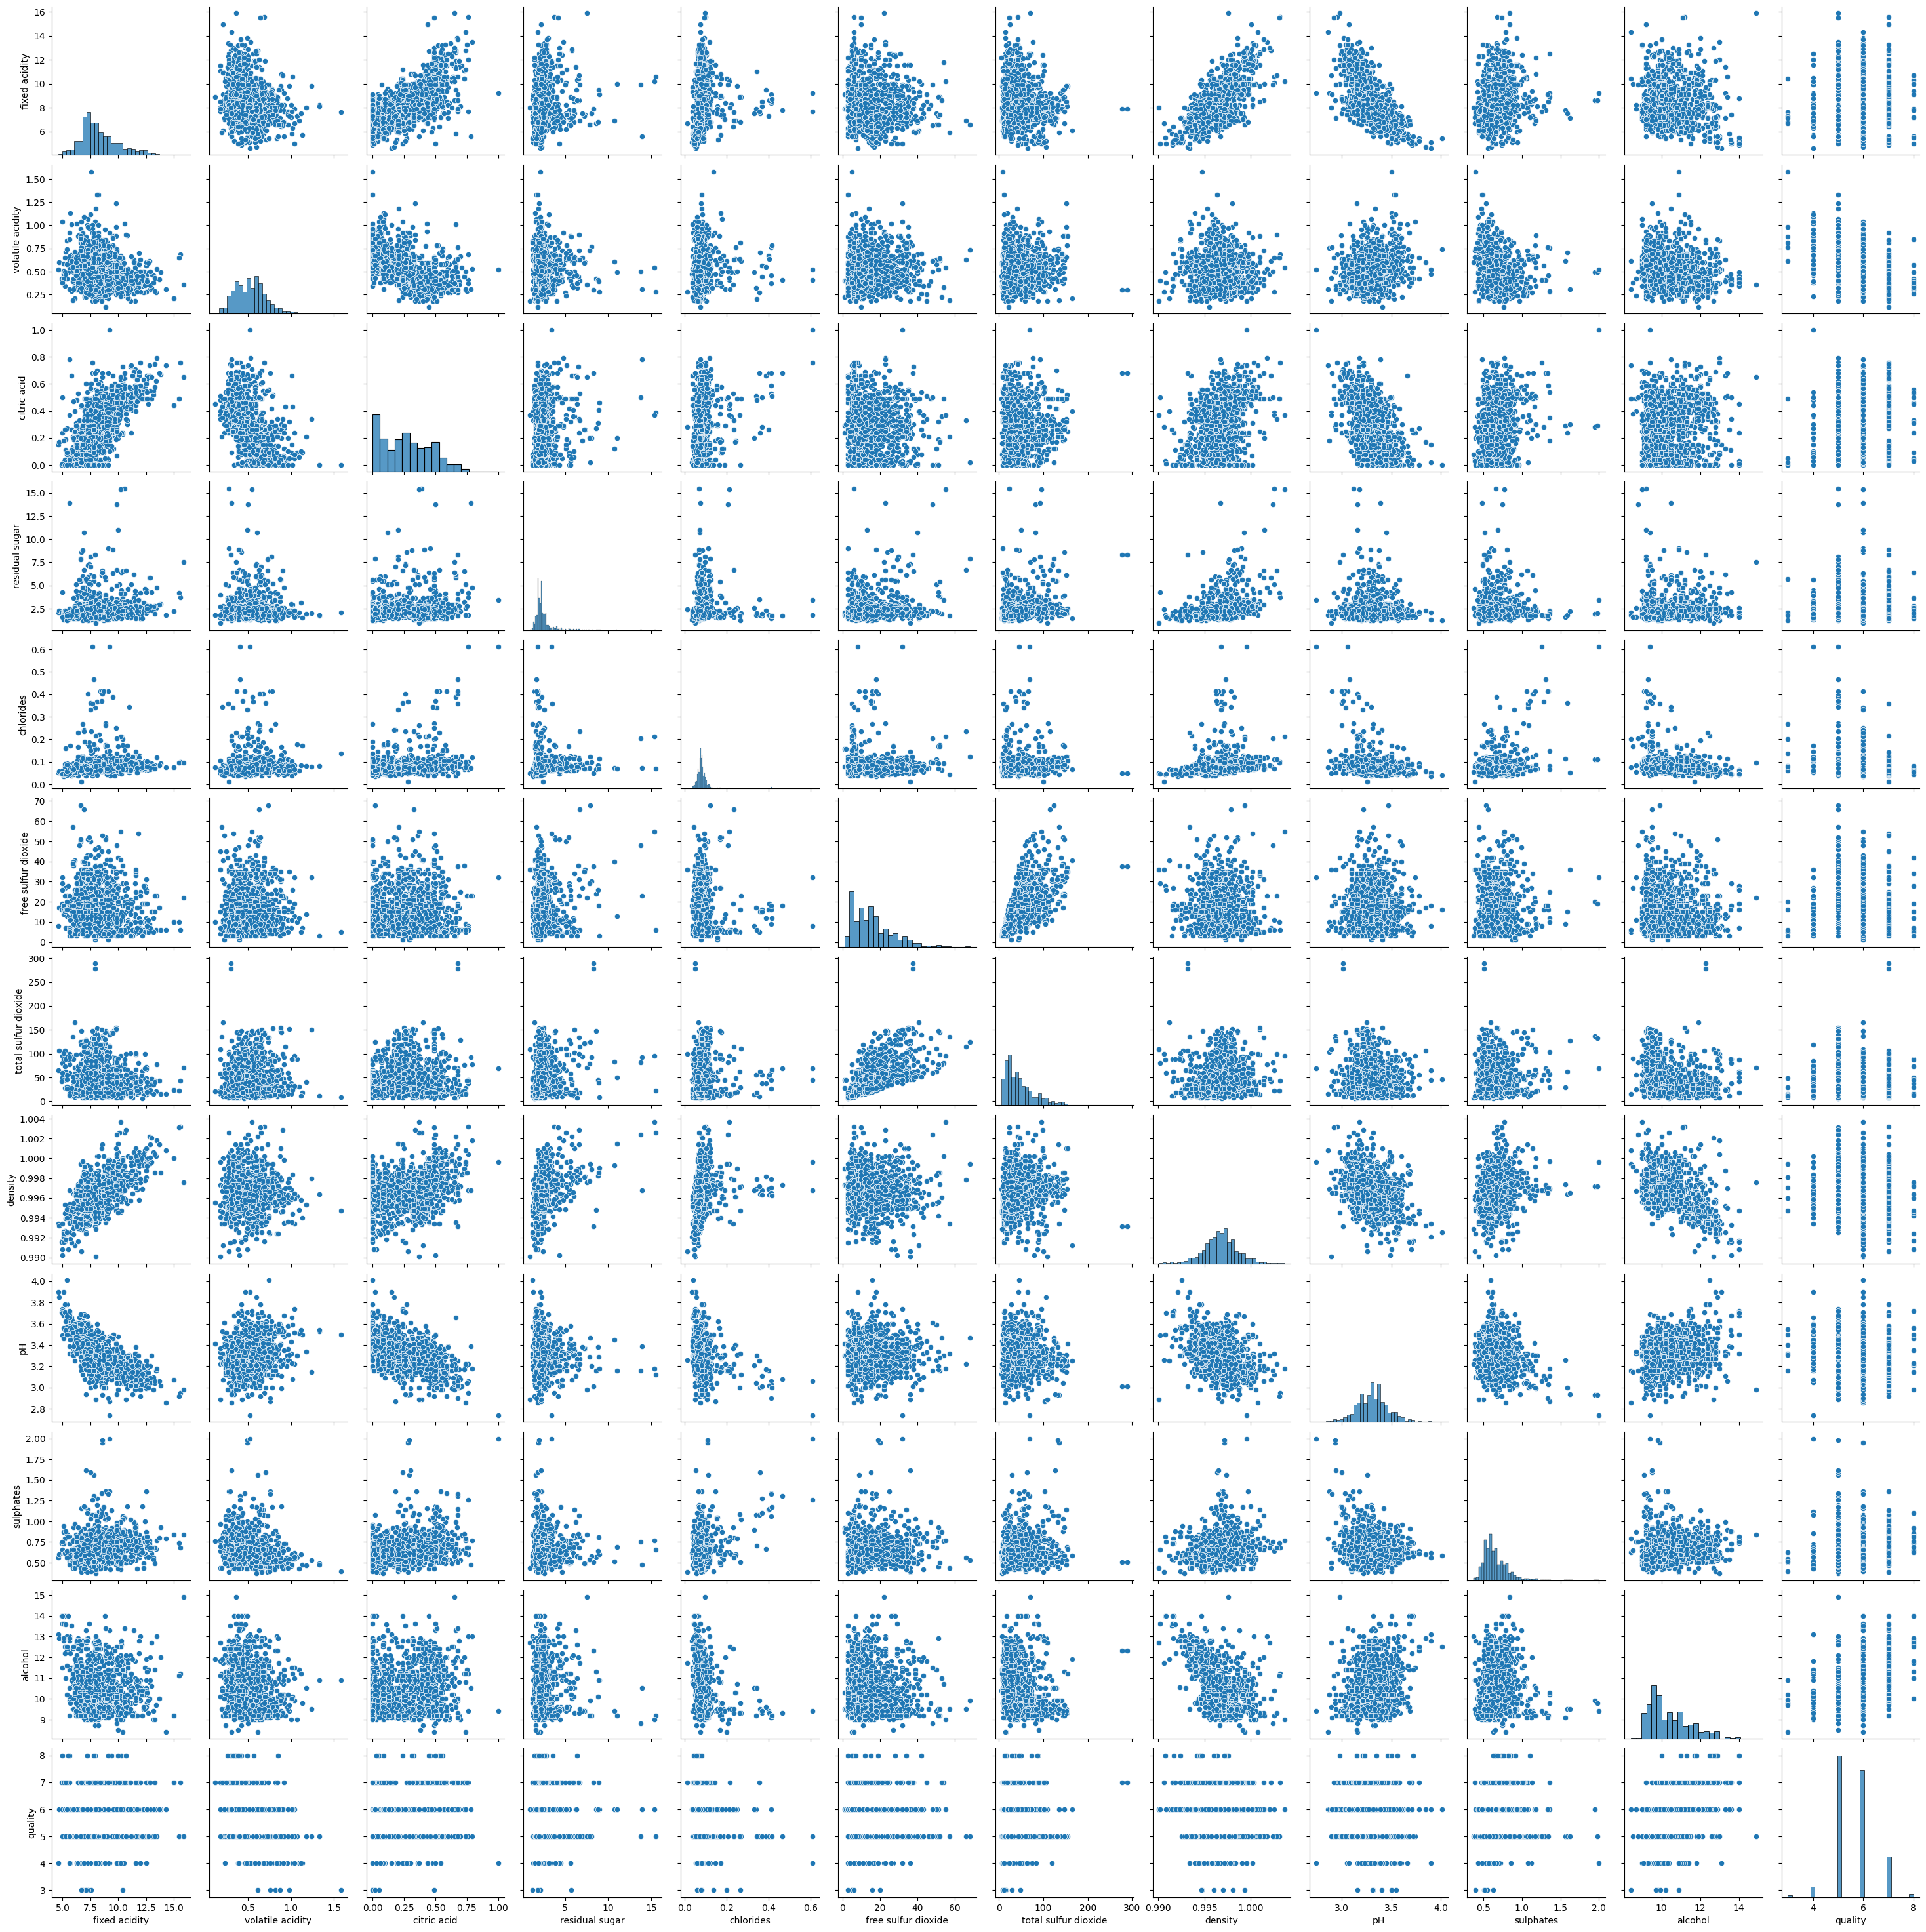

In [175]:
sns.pairplot(df)
plt.show()

In [176]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

### Train Set

In [177]:
X_train = train_set.drop("quality", axis=1)
y = train_set["quality"].copy()

In [178]:
min_max_scaler = MinMaxScaler()
X_prepared = min_max_scaler.fit_transform(X_train)

In [179]:
X_prepared

array([[0.19230769, 0.49315068, 0.03797468, ..., 0.57391304, 0.12025316,
        0.69642857],
       [0.20192308, 0.28767123, 0.16455696, ..., 0.65217391, 0.17088608,
        0.25      ],
       [0.26923077, 0.2739726 , 0.16455696, ..., 0.49565217, 0.13924051,
        0.42857143],
       ...,
       [0.25961538, 0.15068493, 0.41772152, ..., 0.42608696, 0.25316456,
        0.66071429],
       [0.53846154, 0.11643836, 0.82278481, ..., 0.31304348, 0.16455696,
        0.60714286],
       [0.34615385, 0.08219178, 0.43037975, ..., 0.31304348, 0.36075949,
        0.44642857]])

In [180]:
LR_model = LinearRegression()
LR_model.fit(X_prepared, y)

LinearRegression()

In [181]:
xa = pd.DataFrame(X_prepared)

In [182]:
predicted_data = LR_model.predict(xa)
predicted_data

array([5.77021111, 5.28885034, 5.69385475, ..., 6.49271467, 6.38624584,
       6.58104686])

In [183]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': y})

,Prognoz,Real baxosi
351,5.770211,7
673,5.288850,5
741,5.693855,6
781,5.812495,7
158,5.355675,5
...,...,...
1044,5.239363,5
1095,4.804314,5
1130,6.492715,7
860,6.386246,6


In [184]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(predicted_data, y)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.6309537264733189


In [185]:
test_set.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1239,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.0,6
1187,7.1,0.220,0.49,1.8,0.039,8.0,18.0,0.99344,3.39,0.56,12.4,6
560,10.8,0.400,0.41,2.2,0.084,7.0,17.0,0.99840,3.08,0.67,9.3,6
767,9.6,0.330,0.52,2.2,0.074,13.0,25.0,0.99509,3.36,0.76,12.4,7
714,6.8,0.560,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2,6


### Test Set

In [186]:
X_test = test_set.drop("quality", axis=1)
y_test = test_set["quality"].copy()

In [187]:
test_set_new = min_max_scaler.fit_transform(X_test)

In [188]:
predicted_data = LR_model.predict(pd.DataFrame(test_set_new))
predicted_data

array([4.98773366, 6.30693407, 5.46428608, 6.32238681, 5.68033191,
       4.47000982, 6.08897458, 4.73193752, 5.55633509, 4.69887202,
       5.35749684, 6.52918871, 5.3227132 , 5.03414171, 4.78940965,
       5.48743602, 5.19712389, 4.57627321, 5.71328566, 5.25921538,
       4.68290688, 5.69658133, 4.69420763, 5.14356907, 4.65728149,
       5.85506213, 5.71015639, 4.95386412, 4.82595139, 5.87334818,
       5.33155935, 4.80473047, 5.82052724, 5.31947052, 5.45386418,
       5.57480963, 4.80617138, 5.56017752, 5.19383   , 5.44840584,
       6.44225703, 5.82790078, 6.29365305, 5.15473965, 5.5836613 ,
       4.68058884, 5.43523415, 4.82240531, 5.57480963, 5.5135291 ,
       6.20146648, 4.90183098, 4.97881946, 4.38564647, 4.21432171,
       5.35052627, 6.06334545, 5.12530295, 5.6195521 , 4.42220957,
       5.86217426, 5.23407435, 4.89400676, 6.11028565, 4.85778203,
       4.60371311, 5.00273782, 6.04452067, 5.35730556, 5.16589098,
       5.86805246, 6.17551803, 5.97136993, 5.06768841, 4.53217

In [189]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': y_test})

,Prognoz,Real baxosi
1239,4.987734,6
1187,6.306934,6
560,5.464286,6
767,6.322387,7
714,5.680332,6
...,...,...
783,5.051641,5
958,5.734229,6
668,6.270980,6
135,4.568868,5


In [190]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(predicted_data, y_test)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.7258461142004865
